# Dia 7
## Temario
- Manipulacion de datos
- Limpierza de datos
- Introduccion a la regresion lineal

In [11]:
import pandas as pd
import numpy as np


In [12]:
# Declarar un diccionario

data = {
    "nombre": ["Ana", "Juan", "Pedro", "Maria", "Luis", None],
    "edad": [23, 35, None, 29, 41, 30],
    "ciudad": ["CDMX", "cdmx", "Monterrey ", "GDL", "  gdl", "CDMX"],
    "ingresos": ["$12,000", "$18,500", "$15,300", None, "$22000.", "$17800."]
    }
# los datos nunca vienen limpios, en caso de que esten limpios son datos sinteticos

## Manupulacion de Datos

In [13]:
# nota: para importar un .csv se usa el :
#variable = pd.read_csv("NombreArchivo.csv")
df = pd.DataFrame(data)
df


,nombre,edad,ciudad,ingresos
0,Ana,23.0,CDMX,"$12,000"
1,Juan,35.0,cdmx,"$18,500"
2,Pedro,NaN,Monterrey,"$15,300"
3,Maria,29.0,GDL,None
4,Luis,41.0,gdl,$22000.
5,None,30.0,CDMX,$17800.


In [16]:
# Si deseas ver las columas puedes hacerlo con
df.columns


Index(['nombre', 'edad', 'ciudad', 'ingresos'], dtype='object')

In [17]:
df.describe(include="all") #Da una descripcion de todas las columnas

,nombre,edad,ciudad,ingresos
count,5,5.00000,6,5
unique,5,NaN,5,5
top,Ana,NaN,CDMX,"$12,000"
freq,1,NaN,2,1
mean,NaN,31.60000,NaN,NaN
std,NaN,6.76757,NaN,NaN
min,NaN,23.00000,NaN,NaN
25%,NaN,29.00000,NaN,NaN
50%,NaN,30.00000,NaN,NaN
75%,NaN,35.00000,NaN,NaN


In [18]:
df.columns

Index(['nombre', 'edad', 'ciudad', 'ingresos'], dtype='object')

In [21]:
df["edad"]

,edad
0,23.0
1,35.0
2,NaN
3,29.0
4,41.0
5,30.0


In [23]:
df[df["edad"] > 30] # se puede repetir este comando uno por uno  pero es ineficionte y usa mucha ram

,nombre,edad,ciudad,ingresos
1,Juan,35.0,cdmx,"$18,500"
4,Luis,41.0,gdl,$22000.
5,None,30.0,CDMX,$17800.


In [30]:
print(df)
df[
    (df["edad"] > 18) &
    (df["ingresos"] != "$22,000") &
    (df["nombre"] != "Juan")
]

  nombre  edad      ciudad ingresos
0    Ana  23.0        CDMX  $12,000
1   Juan  35.0        cdmx  $18,500
2  Pedro   NaN  Monterrey   $15,300
3  Maria  29.0         GDL     None
4   Luis  41.0         gdl  $22000.
5   None  30.0        CDMX  $17800.


,nombre,edad,ciudad,ingresos
0,Ana,23.0,CDMX,"$12,000"
3,Maria,29.0,GDL,None
4,Luis,41.0,gdl,$22000.
5,None,30.0,CDMX,$17800.


In [39]:
#uso de count(), mean(), sum(), fillna(), str.replance(), astype()
print(df["edad"].count()) # Cuenta cuntos datos en total, son 6 datos pero uno de los natos es None
print("--------------------------")
print(df["edad"].mean()) #promedio
print("--------------------------")
print(df["edad"].sum()) #suma
print("--------------------------")
print(df["nombre"].fillna("Desconocido")) #fillna, es rellenar los valores None con el dato que necesites
print("--------------------------")
print(df["ingresos"].str.replace("$", "").str.replace(",", "").astype(float))
#str.replace reemplaza x simbolos por y
#.astype(tipo_de_dato) cambia el tipo de dato


5
--------------------------
31.6
--------------------------
158.0
--------------------------
0            Ana
1           Juan
2          Pedro
3          Maria
4           Luis
5    Desconocido
Name: nombre, dtype: object
--------------------------
0    12000.0
1    18500.0
2    15300.0
3        NaN
4    22000.0
5    17800.0
Name: ingresos, dtype: float64


## Liempieza de Datos

In [168]:
df_clean = df.copy()
print(df_clean)
# Rellenar valores faltantes
df_clean["edad"] = df_clean["edad"].fillna(df_clean["edad"].mean()) #Todos los valores None los va a asignar como media de los demas datos
df_clean["ingresos"] = df_clean["ingresos"].fillna("$0") #convertimos none a 0 para no cuasar ruido
df_clean["nombre"] = df_clean["nombre"].fillna("Desconocido")
print("--------------------------")
df_clean

  nombre  edad      ciudad ingresos
0    Ana  23.0        CDMX  $12,000
1   Juan  35.0        cdmx  $18,500
2  Pedro   NaN  Monterrey   $15,300
3  Maria  29.0         GDL     None
4   Luis  41.0         gdl  $22000.
5   None  30.0        CDMX  $17800.
--------------------------


,nombre,edad,ciudad,ingresos
0,Ana,23.0,CDMX,"$12,000"
1,Juan,35.0,cdmx,"$18,500"
2,Pedro,31.6,Monterrey,"$15,300"
3,Maria,29.0,GDL,$0
4,Luis,41.0,gdl,$22000.
5,Desconocido,30.0,CDMX,$17800.


In [157]:
df_clean["ciudad"] = (
    df_clean["ciudad"]
    .str.lower() #conviente todo en minusculas o upper para mayusculas
    .str.strip() #quitar espacios
)
print(df_clean)

        nombre  edad     ciudad ingresos
0          Ana  23.0       cdmx  $12,000
1         Juan  35.0       cdmx  $18,500
2        Pedro  31.6  monterrey  $15,300
3        Maria  29.0        gdl       $0
4         Luis  41.0        gdl  $22000.
5  Desconocido  30.0       cdmx  $17800.


In [49]:
#Ahora con los datos limpios podemos trabajar con ellos
#Ejercicio Rápido
# 1)Saca los nombre de todos
# 2)Saca los nombres de todos sin los que digan desconocidos
# 3)Saca la cantidad de personas que hay por medio de ciudad
# Ahora pondremos uno un poco más dificil
# 4)Saca TODOS los datos donde no se muestre desconocido, donde no se muestren los que son de monterrey en ciudad
# y donde no se muestre los ingresos que sean $0
# 5)Saca la edad promedio de las personas que no son de la ciuadd de cdmx que ganan mayor o igual que $10,000

In [146]:
# 1) Saca los nombre de todos
df_clean["nombre"]

,nombre
0,Ana
1,Juan
2,Pedro
3,Maria
4,Luis
5,Desconocido


In [147]:
# 2) Saca los nombres de todos sin los que digan desconocidos
df_clean[df_clean["nombre"] != "Desconocido"]

,nombre,edad,ciudad,ingresos
0,Ana,23.0,cdmx,"$12,000"
1,Juan,35.0,cdmx,"$18,500"
2,Pedro,31.6,monterrey,"$15,300"
3,Maria,29.0,gdl,$0
4,Luis,41.0,gdl,$22000.


In [148]:
# 3)Saca la cantidad de personas que hay por medio de ciudad
df_clean["ciudad"].count()

np.int64(6)

In [149]:
#4)Saca TODOS los datos donde no se muestre desconocido, donde no se muestren los que son de monterrey en ciudad
# y donde no se muestre los ingresos que sean $0

df_clean[(df_clean["nombre"] != "Desconocido") & (df_clean["ingresos"] != "$0") & (df_clean["ciudad"] != "monterrey")]



,nombre,edad,ciudad,ingresos
0,Ana,23.0,cdmx,"$12,000"
1,Juan,35.0,cdmx,"$18,500"
4,Luis,41.0,gdl,$22000.


In [158]:
#Saca la edad promedio de las personas que no son de la ciuadd de cdmx que ganan mayor o igual que $10,000

df_clean[(df_clean["ciudad"] != "cdmx") & (df_clean["ingresos"] >= "$10000")]["edad"].mean()

np.float64(36.3)

In [184]:
df_clean["ingresos"] = df["ingresos"].str.replace("$", "").str.replace(",", "").astype(float)



In [185]:
df_clean

,nombre,edad,ciudad,ingresos
0,Ana,23.0,CDMX,12000.0
1,Juan,35.0,cdmx,18500.0
2,Pedro,31.6,Monterrey,15300.0
3,Maria,29.0,GDL,NaN
4,Luis,41.0,gdl,22000.0
5,Desconocido,30.0,CDMX,17800.0


In [186]:
df_clean["ingresos"] = (
    df["ingresos"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
    .fillna(0)
)

print(df_clean)


        nombre  edad      ciudad  ingresos
0          Ana  23.0        CDMX   12000.0
1         Juan  35.0        cdmx   18500.0
2        Pedro  31.6  Monterrey    15300.0
3        Maria  29.0         GDL       0.0
4         Luis  41.0         gdl   22000.0
5  Desconocido  30.0        CDMX   17800.0


# Introduccion a la Regresion Lineal

In [153]:
from sklearn.linear_model import LinearRegression

# Que es una regesion lineal?
Una regresion intenta predecir un valor teorico a partir de otros otros datos

Ejemplo:
- Predecir ingresos segun edad
- Predecir precion segun tamaño

Aqui usaremos regresion lineal: el tipo mas simple

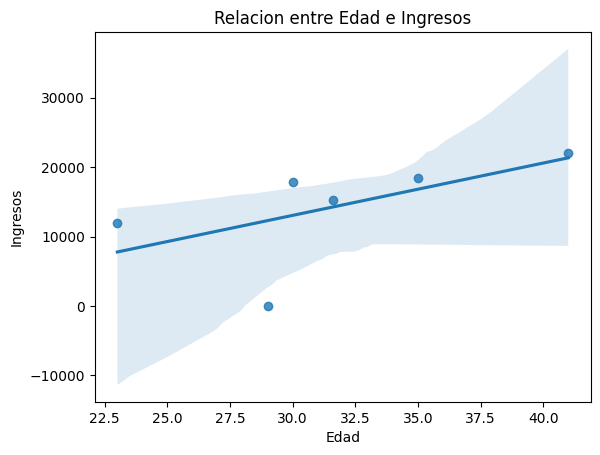

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
#seaborn es como matplotlib pero mas profecional, pero es mas complejo, es una herramienta extra

sns.regplot(x = df_clean["edad"], y = df_clean["ingresos"])
plt.xlabel("Edad")
plt.ylabel("Ingresos")
plt.title("Relacion entre Edad e Ingresos")
plt.show()

In [188]:
# MATRIZ DE CORRELACION

#df_clean.corr() Es para hacer una correlacion, son valores
# las correalciones altas significa que los datos tienen mas correalaciones y miestras mas alejados menos relacion tienen
# si pongo df_clean[VAR, VARn].corr va a marcar error por los tipos de datos estar en str

#nivel de correlacion

# 0.0 -> nada
# 0.3 -> debil
# 0.5 - 0.7 -> moderada
# > 0.8 -> fuerte

df_clean[["edad", "ingresos"]].corr()

,edad,ingresos
edad,1.000000,0.588779
ingresos,0.588779,1.000000


In [181]:
print(df_clean)

        nombre  edad      ciudad  ingresos
0          Ana  23.0        CDMX   12000.0
1         Juan  35.0        cdmx   18500.0
2        Pedro  31.6  Monterrey    15300.0
3        Maria  29.0         GDL       NaN
4         Luis  41.0         gdl   22000.0
5  Desconocido  30.0        CDMX   17800.0


In [191]:
# Para aprender bien de los data set es recomendable usar uno de medicina

x = df_clean[["edad"]]  #Variable de entrada, estos se tiene que hgacer despues de la matriz de correlacion
y = df_clean["ingresos"]  #Variable de salida
modelo = LinearRegression()
modelo.fit(x, y) #manera de entrenar al modelo con los datos de entrada y de salida, en este caso esta correlacionado con la formula de la corriente


LinearRegression()

Tiene realcion con la formula de la pendiente
Que hace fit? Busca los valores de m, y b que mejor se ajustan a los datos.
Minimiza el error entre los ingresos reales y los ingresos predichos

In [192]:
edad_nueva = [[30]]
prediccion = modelo.predict(edad_nueva)
print(prediccion)

[13061.25181951]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [194]:
#Podemos evaluar el modelo
from sklearn.metrics import r2_score, mean_squared_error
y_pred = modelo.predict(x)
#ingresos = β0 + β1 · edad
#β0 → intercepto
#β1 → coeficiente de edad

r2 = r2_score(y, y_pred)
# 0.3 - 0.5 -> aceptable, pero siempre es mejor tener un modelo 0.6 - 0.8
# o muy bueno > 0.8

mse = mean_squared_error(y, y_pred)
print(r2)
# Regresion Logistica se suele usar -> Accuaracy, Precision, F1 Score, Recall, Roc, Auc

0.34666091920946085


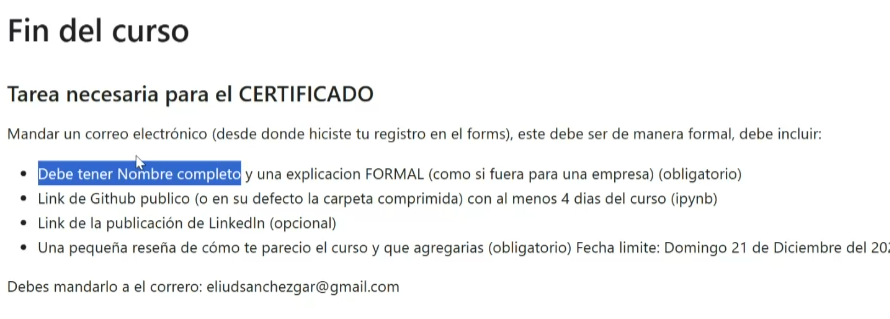

Se debe de agregar el correo con el que nos registramos, por si acaso agrega tambien el universitario